# Training a Neural Network

## Goal
* We want to find the best weights of a neural network for the given task
* How can we do it?
    * Minimize the loss as a function of the parameters (weights)
    * We can use gradient descent for this

Our goal is to find the best weights of a neural network for the given task. This goal is quite general, so let's look at it more closely. In particular, we want to minimize the loss as a function of the parameters (weights). This is something that we can do using gradient descent.

## Loss Functions
Key aspects:
* Various loss functions are suitable for different tasks
* The loss functions need to be smooth so that we can differentiate through them

Regression:
* Mean Squared Error (MSE)
* Mean Absolute Error (MAE)

Classification:
* Binary: Binary cross-entropy with sigmoid
* Multi-class: Cross-entropy with softmax

In each case we compare the outputs of the neural network with the targets

Before diving deep into gradient descent, let's discuss how the loss function will be calculated - as this is what gradient descent is supposed to minimize. There are various loss functions available and they are suitable for different tasks. The loss functions need to be smooth so that we can differentiate through them and successfully use gradient descent for training the neural networks. For regression, the two most common loss functions are Mean Squared Error (MSE) and Mean Absolute Error (MAE). For classification, we have binary cross-entropy with sigmoid for the case of binary classification and cross-entropy with softmax for the multi-class case. In each case we compare the outputs of the neural network with the targets.

## Loss - Regression
* Neural network predicts value $\hat{y}_i$ for example $i$, while the true value is $y_i$

* The mean is calculated across $N$ examples

* Mean Squared Error (MSE):
$$\text{MSE}=\frac{1}{N}\sum_{i=1}^N \left(\hat{y}_i-y_i\right)^2$$

* Mean Absolute Error (MAE):
$$\text{MAE}=\frac{1}{N}\sum_{i=1}^N \left|\hat{y}_i-y_i\right|$$

* MSE is used more often and it penalizes larger errors more

Neural network predicts value $\hat{y}_i$ for example $i$, while the true value is $y_i$. When calculating the loss function, we take the mean across $N$ examples. Mean Squared Error (MSE) is defined using the formula on the slide and is basically the mean of the squared differences between the predicted value and the true value. Mean Absolute Error (MAE) is similar, but we take absolute value instead of the square. MSE is used more often and it penalizes larger errors more.

## Loss - Classification
Accuracy (zero-one loss) is not smooth, so alternative is needed

Cross-entropy is the most common loss function for classification in neural networks
* Measures the relative entropy (disorder/disagreement) between two probability distributions (true labels $y_i$ and predicted labels $\hat{y}_i$)
* Also known as log loss
* Binary and multi-class case
    * Multi-class case is a generalization of the binary case

Accuracy (zero-one loss) is not smooth, so alternative is needed - typically this is cross-entropy. Cross-entropy, also known as log loss, is the most common loss function for classification in neural networks. It measures the relative entropy (disorder/disagreement) between two probability distributions (true labels and predicted labels). We typically distinguish the binary and multi-class case as the binary case is often easier and simpler to explain. Multi-class case is a generalization of the binary case.

## Loss - Cross-Entropy
Information theory perspective:
* Event $x$ occurring with probability $P(x)$ for space of events $X$
* Information: $h(x)=-\log(P(x))$
    * Event gives more information if it is less probable
* Entropy: $H(X) = -\sum_{x \in X} P(x) \log(P(x))$
    * Describes the average amount of information for the random variable $X$
    
Cross-entropy:
* Relative amount of information/surprise between the two distributions considered (in particular the true and predicted)
* We want to minimize this quantity
* We take information of the predicted distribution ($\hat{y_i}$) and average it based on the true distribution ($y_i$)

It is often very useful to look at cross-entropy from the information theory perspective as it allows us to understand it better what cross-entropy measures and why it makes sense.

We consider event $x$ occurring with probability $P(x)$ for space of events $X$.

Information is defines as the negative log probability of the event $x$ - the idea behind this is that event gives more information if it is less probable.

Entropy is defined using the formula on the slide and it measures the average amount of information for the random variable $X$.

Now that we have covered both information and entropy, we can look at cross-entropy. Cross-entropy measures the relative amount of information/surprise between the two distributions considered (in particular the true and predicted). We want to minimize this quantity as we do not want to see any differences between the true and predicted distributions. As part of cross-entropy, we take information of the predicted distribution ($\hat{y_i}$) and average it based on the true distribution ($y_i$).

## Loss - Binary Cross-Entropy
* Neural network has a single output for each example
* Sigmoid activation function makes the output a probability:
$$\text{sigmoid}(x)=\frac{1}{1+e^{-x}}$$
* Loss function:
$$\text{binary cross-entropy}=-\frac{1}{N}\sum_{i=1}^N y_i\log\left(\hat{y}_i\right)+\left(1-y_i\right)\log\left(1-\hat{y}_i\right)$$

Neural network has a single output for each example, which is then converted into probability using sigmoid activation function. Binary cross-entropy is defined using the formula on the slide.

## Loss - Multi-Class Cross-Entropy
* Neural network gives $C$ outputs for each example ($C$ classes)
* Softmax function makes the outputs a probability distribution (example $i$, class $c$):
$$\text{softmax}(x_{i,c})=\frac{e^{x_{i,c}}}{\sum_{j=1}^C e^{x_{i,j}}}$$
* The outputs from softmax will give predictions $\hat{y}_{i,c}$
* Targets $y_i$ are converted using one-hot encoding into $y_{i,c}$
    * Example - label 2 if the classes are from 0 to 3:
$$2 \rightarrow \left[0,0,1,0\right]$$
* Loss function:
$$\text{cross-entropy}=-\frac{1}{N}\sum_{i=1}^N \sum_{j=1}^C y_{i,j}\log(\hat{y}_{i,j})$$

Neural network gives $C$ outputs for each example ($C$ classes). Similarly as before, we need to convert these predictions into probabilities, which can be done using Softmax function. The targets also need to be in a compatible form, which is why we will convert them using one-hot encoding. For example, label 2 will be converted to vector $\left[0,0,1,0\right]$ if there are classes 0 to 3.Cross-entropy is then defined using the formula on the slide, where we take the sum across $N$ examples and $C$ classes for each example.

##  Cross-Entropy Visualization
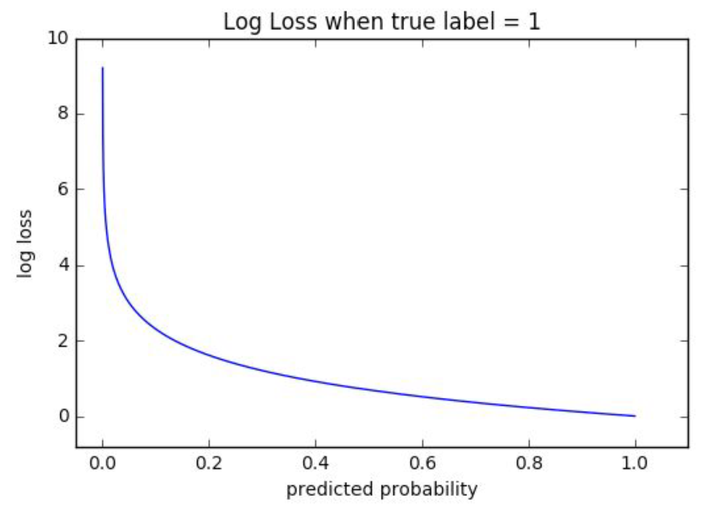

Cross-entropy, also known as log loss has the shape shown on the plot (for true label 1).

## Gradient Descent
Overview:
* **Iterative** algorithm to **optimize** the parameters of a differentiable function
* Updates the parameters in the direction that **decreases** the loss the most
    * Based on calculating the gradient of the loss with respect to the model weights
    * Gradient gives us the slope with respect to the various parameters
* **Foundation** of most approaches for optimizing neural networks
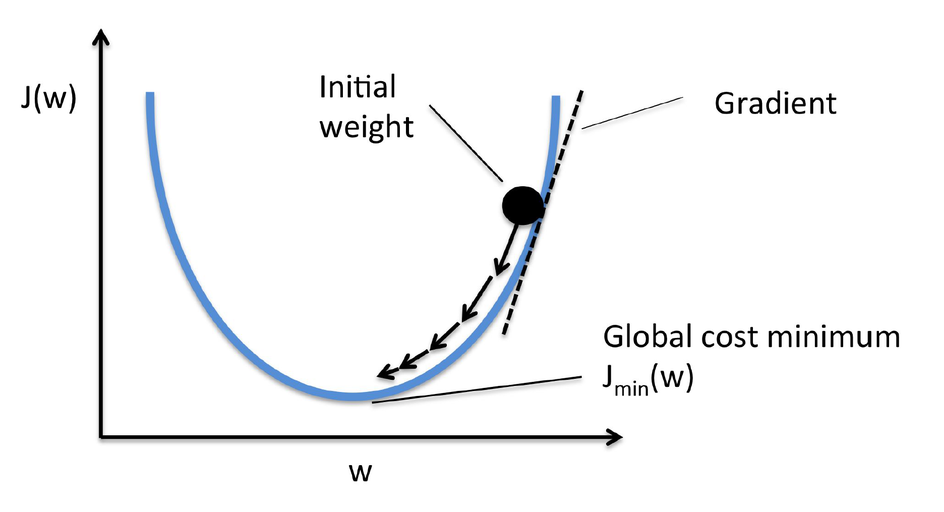

Now that we have covered different loss functions, we are ready to discuss in detail the algorithm that will allow us to optimize the loss functions. Gradient descent is an iterative algorithm to optimize the parameters of a differentiable function. It updates the parameters in the direction that decreases the loss the most. It is based on calculating the gradient of the loss with respect to the model weights. Gradient gives us the slope with respect to the various parameters. Gradient descent is the foundation of most approaches for optimizing neural networks. 

The illustration shows what the optimization process looks like. We start at some initial weights, and then we change the weights in the direction that decreases the cost the most. Eventually we will end up in a cost optimum. In this simple case it is global optimum, but as you will see later, we may not always reach a global optimum.

## Gradient Descent - Details
How does it work?
* Start by randomly initializing the neural network weights $w$
* Update the weights $w$ for a selected number of steps:
$$w \leftarrow w-\eta \nabla_w L(w)$$
* $\eta$ is the learning rate (step size) and $L$ is the loss function

Stochastic gradient descent (SGD):
* Use one (online) or a few (mini-batch) randomly selected examples when calculating the gradient
* Mini-batch is simply a set of several examples that are used together

Let's discuss how gradient descent works. You have already seen the high level details earlier, but it will be useful to see the overview before going into the details. We start by randomly initializing the neural network weights $w$. Then we update the weights $w$ for a selected number of steps. $\eta$ is the learning rate (step size) and $L$ is the loss function.

In practice, it is not feasible to calculate the loss across all training examples, so we use stochastic gradient descent instead. SGD uses one (online) or a few (mini-batch) randomly selected examples when calculating the gradient. Mini-batch is simply a set of several examples that are used together.

## Gradient Descent - Local Optima
* The loss surface is not convex for standard neural networks, so gradient descent is not guaranteed to find the best weights for neural networks
* Tricky to make sure we find "good enough" weights
* SGD helps with not getting stuck in a bad local minimum


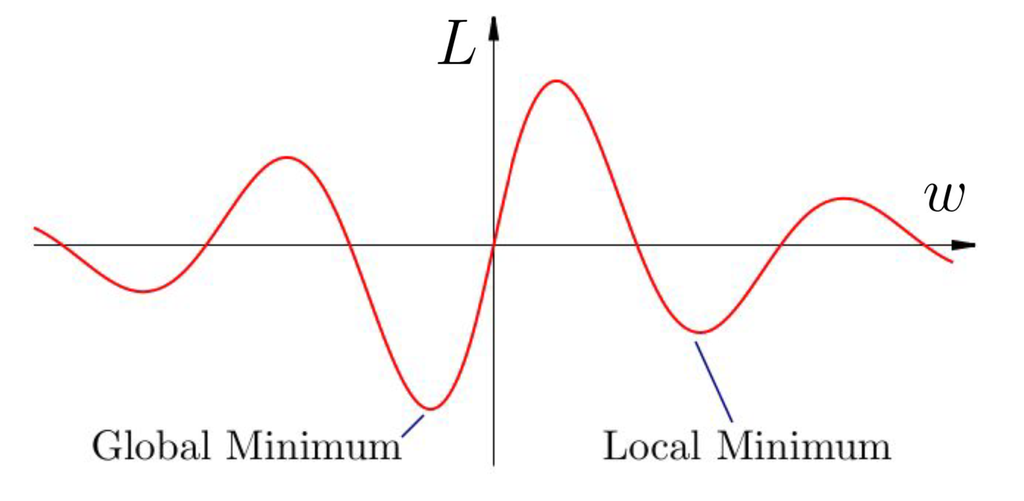
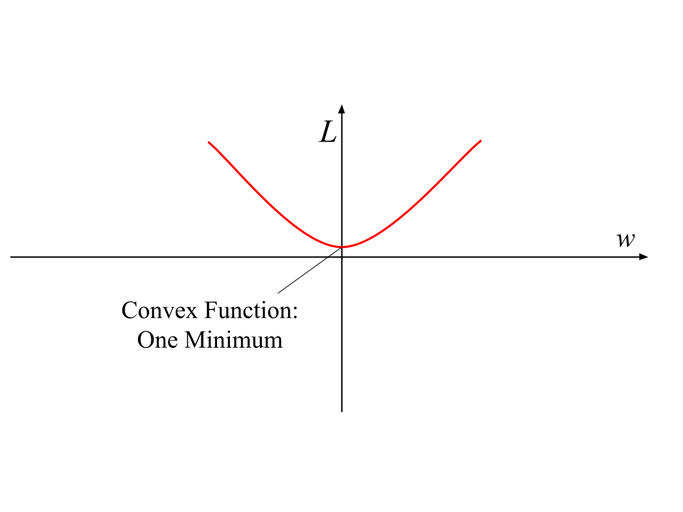

The loss surface is not convex in the case of most neural networks, so gradient descent is not guaranteed to find the best weights for neural networks. For comparison, you can see another function that is convex and has only one optimum as a result. It is tricky to make sure we find "good enough" weights, but fortunately there are several methods that help with this. For example, the simple idea of using a mini-batch as part of SGD already helps and there are further extensions of gradient descent that help us avoid getting stuck in a bad local optimum.

## Key Parts of SGD
* Weight initialization
* Learning rate
* Calculation of gradients (back-propagation)
* Batch size
* Number of training iterations

Before we discuss what extensions there are for SGD, we should go deeper into SGD and discuss things such as weight initialization, learning rate, back-propagation, batch size and the number of training iterations. These are key parts of training neural networks with SGD.

## Weight Initialization
* The weights are initialized before starting the gradient descent
* Different initializations can lead to different end results because of non-convex optimization
* Set the initial weights to small random values
    * Constant initialization would prevent the network from learning anything
* Deep learning frameworks handle random initializations automatically, or different initializations can be specified

At the beginning of training, we need to initialize the weights to some initial values. Different initializations can lead to different end results because of non-convex optimization, so initialization is quite important. The initial weights should not be constant zero as that would prevent us from learning. We set them to small random values, using various initialization schemes. Deep learning frameworks handle random initializations automatically, but different initializations can be specified.

## Xavier (Glorot) Initialization
* Notation: $n_{in}$ is the number of units in the previous layer and $n_{out}$ is the number of units in the next layer
* Uniform: $$w_i\sim U\left(-\sqrt{6/(n_{in}+n_{out})}, \sqrt{6/(n_{in}+n_{out})}\right)$$
* Normal: $$w_i\sim \mathcal{N}\left(0,2/(n_{in}+n_{out})\right)$$

One of the most common schemes is the Xavier or Glorot initialization. The weights in a layer are initialized based on the number of units in the previous layer and the number of units in the next layer. There is both uniform and normal version.

## Learning Rate
* Often fixed but dynamic strategies exist as well
  * Start with a large learning rate and then decrease it during training
* Some optimisers set the learning rate automatically
* Too large learning rates can lead to divergent behaviours
    * Very large weight updates and instability

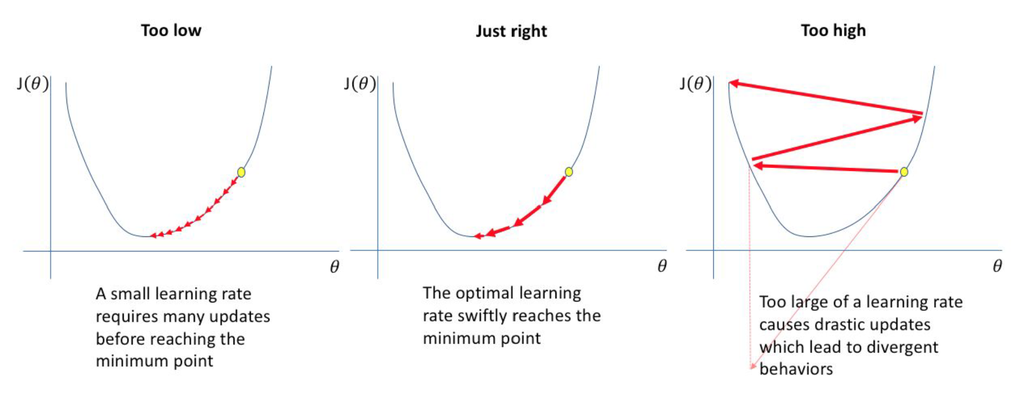

Another key part of gradient descent is the learning rate or step size. It is usually fixed but dynamic strategies exist as well. For example, we can start with a large learning rate, and decrease it as the number of time steps increases. Some optimizers set the learning rate automatically. Too large learning rates can lead to divergent behaviours as they lead to very large weight updates, generally resulting in instability.

## Learning Rate Scheduling
* Start with a **larger** learning rate and **decrease** it over time
* Implemented via learning rate schedulers
* Common strategies:
    * **Piecewise constant decay**: directly specify what learning rate to use at different stages of training
    * **Exponential decay**: multiply the learning rate by a value less than 1 each time a number of epochs passes
    * **Polynomial decay**: specify the initial and final learning rate, and decrease the learning rate every step as a polynomial function of the elapsed number of steps out of all

In practice it is very useful to use learning rate scheduling as it allows us to accelerate training in the early stages and still obtain good well-optimized weights. We start with a larger learning rate and decrease it over time. These are typically implemented using learning rate schedulers that are available in the common deep learning libraries such as Keras or PyTorch. Common strategies for learning rate scheduling include:

* Piecewise constant decay: directly specify what learning rate to use at different stages of training
* Exponential decay: multiply the learning rate by a value less than 1 each time a number of epochs passes
* Polynomial decay: specify the initial and final learning rate, and decrease the learning rate every step as a polynomial function of the elapsed number of steps out of all. We can use for example linear or quadratic version of this scheduler.

## Learning Rate Scheduling
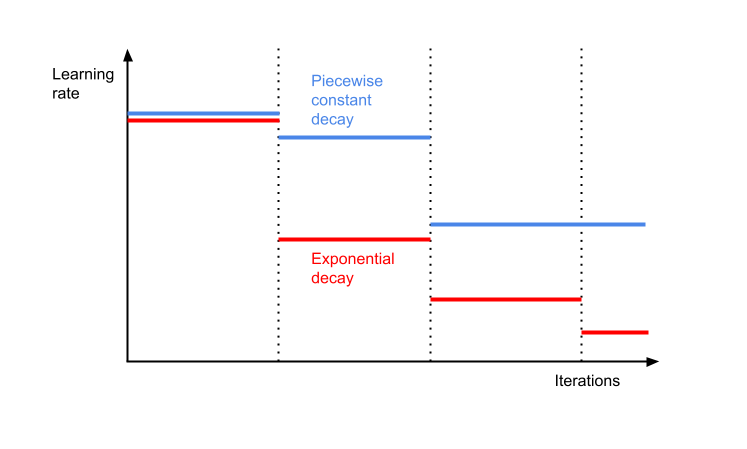

Let's have a look at what these different learning rate schedules look like. You can see an example of both piecewise constant and exponential decay on the slide. For the piecewise case, we manually define what values the learning rate should take at the different stages of training. For exponential decay, the learning rate halves every fixed number of iterations. Of course, it does not need to halve - it can decay by any other factor too.

## Learning Rate Scheduling
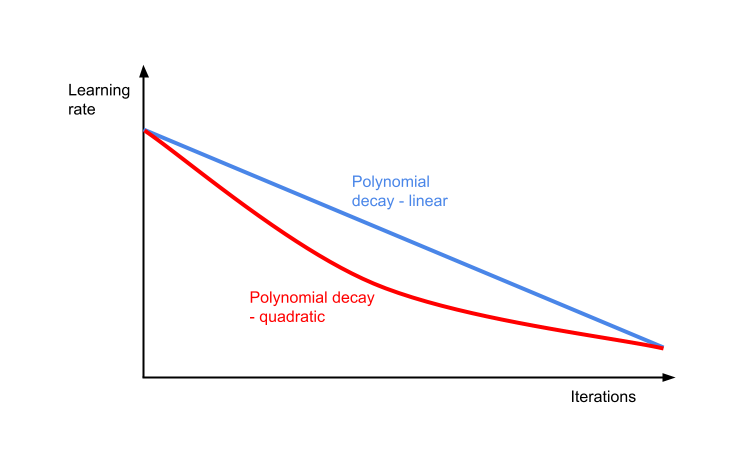

Polynomial decay looks different from the previously seen cases. We typically specify the initial and final learning rate and then we decay the learning rate as a polynomial function. It can be for example linear or quadratic function, both of which are shown on the slide. 

## Back-Propagation - Review
* Neural network is a composition of matrix multiplications and activations
$$f(x)=\sigma_{n}(W_{n}\sigma_{n-1}(W_{n-1}\sigma_{n-2}(...)))$$
* We need the gradient of loss $L$ with respect to all weights $w$
* The derivatives can be computed efficiently using a recursive algorithm that stores intermediate terms - known as **back-propagation**
* Back-propagation uses the **chain rule**, **recursively** applied to previous computations
$$\frac{\partial L}{\partial w_{ij}^k}=\frac{\partial L}{\partial h_j^k}\frac{\partial h_j^k}{\partial w_{ij}^k},$$
where $h_j^k$ is a hidden unit activation of node $j$ in layer $k$
* Deep learning packages take care of these calculations via auto-differentiation


We have covered back-propagation in enough detail earlier, but given its relevance for training neural networks, we will review it again. Generally neural network is a composition of matrix multiplications and activations. We need to calculate the gradient of the loss with respect to all weights. The derivatives or gradients can be computed efficiently using a recursive algorithm that stores intermediate terms - known as back-propagation. Back-propagation uses the chain rule, recursively applied to previous computations. Deep learning packages take care of these calculations via auto-differentiation, so fortunately for us back-propagation is very simple to use in practice.

## Batch Size
* In SGD, loss is calculated over a **mini-batch** of examples
* Q: How to select the mini-batch size?
* A: There are several **trade-offs** - **larger** mini-batches
    * make the loss and gradients **less noisy**
    * **take longer** to calculate per batch
    * may sometimes not fit into GPU memory
* Reasonable size is dataset specific: could be e.g. 16 or also 128

When calculating the loss, we calculate it over a mini-batch of examples. So a sensible question to ask is: how big should this mini-batch be? There are several trade-offs when deciding on the size of the mini-batch. Larger mini-batches make the loss and gradients less noisy, but they take longer to calculate per batch. In some cases a too large mini-batch may not even fit into GPU memory, leading to errors. Reasonable size is dataset specific, so it could be e.g. 16 or also 128.

## Number of Training Iterations
* Often specified in terms of **epochs**: number of full passes through the training data
* Usually a relatively **large** number is selected and then combined with **early stopping**
* We want to see the validation error has stopped decreasing significantly
* If the validation error has started increasing, use a model saved at the point of the lowest validation error

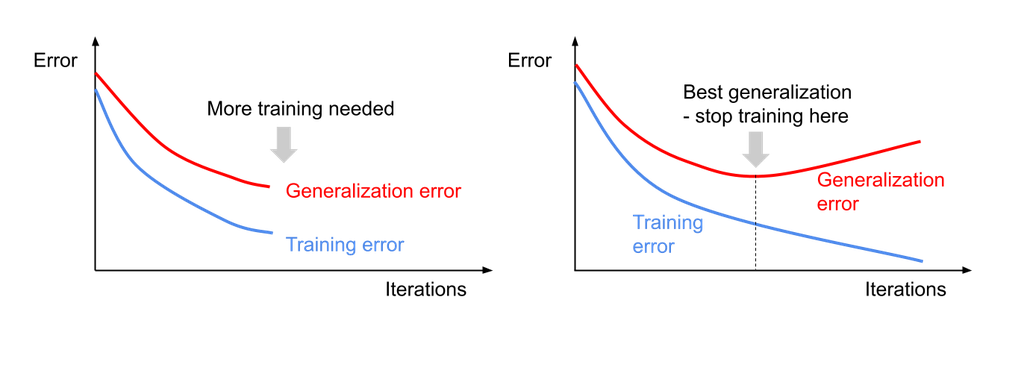

The number of training iterations is another crucial aspect of training neural networks. It is often specified in terms of epochs, which is the number of full passes through the training data. We usually select a relatively large number and then combine it with early stopping that you have seen earlier. We want to see the validation error has stopped decreasing significantly. If the validation error has started increasing, use a model saved at the point of the lowest validation error.

The plots show examples of situations when more training is needed and also of a case when we have done more than enough training and can use early stopping to use the model with the best generalization abilities.

## Further Important Parts of Training Neural Networks
* Data normalization
* Batch normalization
* Activation functions
* Regularization

There are several further important details of training neural networks in practice. These include details such as data normalization, batch normalization, the choice of activation functions and regularization.

## Data normalization
* Normalized data typically lead to more efficient training of neural networks
* Calculate the mean and the standard deviation of the training data
    * E.g. colour images: calculate it across each R,G,B channel separately
* Normalization:
$$\hat{x}_i=\frac{x_i-\text{mean}(X^{train})}{\text{std}(X^{train})}$$
* Test set is normalized using the train set mean and standard deviation

A key part of training neural networks is to normalize the data - as normalized data typically lead to more efficient training of neural networks. As part of data normalization, we subtract the mean and divide by the standard deviation of the training data. In the case of colour images, we calculate the values across each R,G,B channel separately. Note that test set is normalized using the train set mean and standard deviation.

## Batch normalization
* Method to accelerate and stabilize training of neural networks
* Based on re-centering and re-scaling of activations within a mini-batch
* Especially useful when there are many layers in a network
    * Can use higher learning rates and weight initialization is less important
* Helps prevent exploding gradients

Batch normalization is a common way to accelerate and stabilize training of neural networks. It is based on re-centering and re-scaling of activations within a mini-batch and is especially useful when there are many layers in a network. It allows us to use higher learning rates and makes weight initialization less important.

## Batch normalization - details
First calculate the mini-batch mean and variance
    $$\mu_{i} \leftarrow \frac{1}{M} \sum_{m=1}^{M} h_{i}^{m},$$
    $$\sigma_{i}^{2} \leftarrow \frac{1}{M} \sum_{m=1}^{M}\left(h_{i}^{m}-\mu_{i}\right)^{2}.$$
Given an activation $$h_i=w_i x,$$
use the mini-batch mean and variance to re-center the activation $$\hat{h}_{i}=\frac{h_{i}-\mu_{i}}{\sqrt{\sigma_{i}^{2}+\epsilon}},$$
and then re-scale the activation $$z_{i}=\gamma_{i} \hat{h}_{i}+\beta_{i}=\operatorname{batchNorm}\left(h_{i}\right).$$

Parameters $\gamma_{i}, \beta_{i}$ are trained together with the weights using back-propagation.

We do batch normalization using the process described on the slide - calculate the mini-batch mean and variance, and then given an activation, use the mini-batch mean and variance to re-center the activation. After this we re-scale the activation using parameters trained together with the weights using back-propagation.

## Batch normalization - details

How estimate the mean and variance for inference, e.g. test set evaluation?

In practice, a moving average of the mean and standard deviation are estimated during training.

How do we estimate the mean and variance for inference, e.g. test set evaluation? In practice, a moving average of the mean and standard deviation are estimated during training. This is typically handled automatically.

## Activation functions
Baseline activation functions: sigmoid and tanh (seen previously)

Better in practice: Rectified Linear Unit (ReLU) and its variations
* Faster to calculate gradients for them

ReLU and variations to avoid zero gradients
* $\text{ReLU}(x)=\max(0,x)$
* $\text{LeakyReLU}(x) = \max(0,x) + \beta\min(0,x)$ ($\beta$ is often 0.01)
* $\text{Softplus}(x)=\frac{1}{\beta}\ln\left(1+e^{\beta x}\right)$ ($\beta$ is often 1)
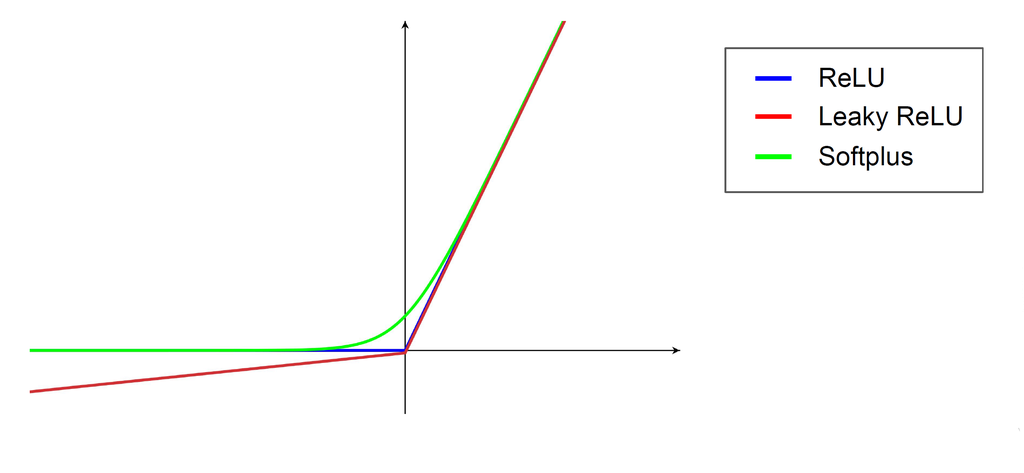

We have seen sigmoid and tanh activation functions earlier and these are often considered as baseline activation functions. In practice, Rectified linear unit (ReLU) and its variations have been more commonly used as they work well and it is faster to calculate the gradients for them. Variations of ReLU help avoid zero gradients.

## Optimization Improvements
* Momentum - averages the gradient over a few past time steps
* Accelerated gradient (Nesterov) - also takes the change in gradient into account
* AdaGrad/RMSprop - use both gradient and average past squared gradients
* Adam - both momentum and average past squared gradients

SGD is currently one of the simplest optimizers and many extensions have been proposed. The simplest is to add momentum to the training process, which averages the gradient over a few past time steps. Another extension - accelerate gradient - also known as Nesterov momentum takes the change in gradient into account. Further, there is AdaGrad/RMSprop, which use both gradient and average past squared gradients. The most common optimizer these days is called Adam, and it uses both momentum and average past squared gradients. A great benefit of Adam is that the standard default settings work well on most problems.

## Momentum
* Motivation: **accelerate the weight updates** in the direction of previous updates
* Leads to **faster** optimization in practice and helps avoid very slow updates in ''shallow valleys'' 
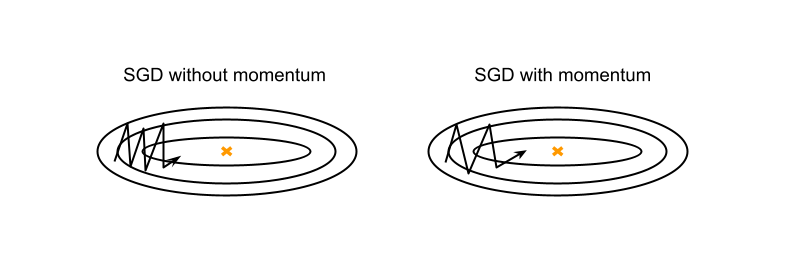

There are various extensions to SGD, but the most fundamental one is that of momentum. Momentum accelerates the weight updates in the direction of previous updates. This in practice leads to faster optimization and helps avoid very slow updates in ''shallow valleys'.

## Momentum
* Exponential moving average of the current and previous gradients
* SGD update:
$$w_{t+1} = w_t-\alpha \nabla_{w_t} L(w_t)$$
* Update with momentum:
$$w_{t+1}=w_t-\alpha m_t$$
where
$$m_t=\beta m_{t-1}+ \left(1-\beta\right)\nabla_{w_t} L(w_t)$$
* Initial momentum is 0, but we need to specify both learning rate $\alpha$ and momentum rate $\beta$
    * Often $\beta=0.9$

Let's discuss momentum in more detail. In particular, momentum takes the exponential moving average of the current and previous gradients. When we compare the formula with SGD, we will see that it looks quite similar, but the update indeed uses previous gradients during the calculation. Initial momentum is 0, but we need to specify both learning rate $\alpha$ and momentum rate $\beta$. We often select $\beta=0.9$.

## Optimization in Practice
* There are many available optimizers
* Adam works well in practice and the **default** parameters are suitable for **most** tasks
    * Adam is often a good default choice and is used by many people
    * However, SGD can produce better results in some cases - highly task-dependent
* **Learning rate** (often denoted as $\alpha$) is usually the most important parameter
    * Default values for the other parameters tend to be quite robust 

There are many available optimizers, so a good question to ask is which of them should we select? Adam works well in practice and the default parameters are suitable for most tasks, so Adam is often a good default choice and is used by many people. However, SGD can produce better results in some cases - so the choice of the best optimizer is highly task-dependent. More generally, learning rate (often denoted as $\alpha$) is usually the most important parameter and the default values for the other parameters tend to be quite robust.

## Hyper-Parameter Optimization
* Model parameters/weights are not the only parts that can be optimized
* Hyper-parameters can be optimized too!
    * E.g. learning rate, details of neural network architecture, weight decay value, ...
* Common strategies:
    * Grid search
    * Random search

Model parameters/weights are not the only parts that can be optimized - hyper-parameters can be optimized too! Hyper-parameters include for example the learning rate, details of neural network architecture or weight decay value. Some of the most common strategies include grid search and random search.

## Grid Search
* Exhaustive search through a specified set of values
* Compare the results using a **validation** set on a specified metric
    * Do not use the test set for this!
    * Common metrics: accuracy (classification), MSE (regression)
* Example: optimize the learning rate $\alpha$
* Potential values to try: $\alpha \in \{1.0, 0.1, 0.01, 0.001, 0.0001\}$
    * Sensible values often form a geometric sequence  
* Grid search takes too long if we try all combinations across many hyper-parameters
    * In practice the hyper-parameters are often independent and can be tried in sequence

Grid Search performs an exhaustive search through a specified set of values. When evaluating the results of the different experiments, we compare the results using a validation set on a specified metric. We should never use the test set for this as it would invalidate our evaluation of the generalization abilities of the neural network. For example, we could select parameters that work particularly well on the test set - which could lead to over-fitting to the test data. Common metrics for comparing the results include accuracy (in the case of classification) and MSE (in the case of regression).

For example, we may want to optimize the learning rate $\alpha$. Potential values to try could be for example between 1.0 and 0.0001. Sensible values often form a geometric sequence, potentially with several other values in between. If we try all combinations across many hyper-parameters, grid search takes too long. In practice the hyper-parameters are often independent and can be tried in sequence.

## Random Search
Overview (given a cost function $f$ to be minimized):
1. Initialize the hyper-parameter values $\boldsymbol{x}$ randomly
2. Repeat the following:
    1. Sample a new value $\boldsymbol{y}$ that is within a given radius from $\boldsymbol{x}$
    2. If $f(\boldsymbol{y})<f(\boldsymbol{x})$, set $\boldsymbol{x}=\boldsymbol{y}$
    
* The loop is repeated e.g. for a fixed number of iterations or until good enough cost function value is obtained

* Random search may find better hyper-parameters than grid search

Another technique to optimize hyper-parameters is random search. It is perhaps less frequently used in the context of neural networks, but still useful to know. Given a cost function $f$ to be minimized, we do the following process:

1. Initialize the hyper-parameter values $\boldsymbol{x}$ randomly
2. Repeat the following:
    1. Sample a new value $\boldsymbol{y}$ that is within a given radius from $\boldsymbol{x}$
    2. If $f(\boldsymbol{y})<f(\boldsymbol{x})$, set $\boldsymbol{x}=\boldsymbol{y}$
    
The loop is repeated e.g. for a fixed number of iterations or until good enough cost function value is obtained. Random search may find better hyper-parameters than grid search, so that is the main benefit in addition to potentially better runtime.

## Summary
* Neural networks are trained using SGD or one of its extensions
* Key details include e.g. the choice of weight initialization, learning rate or batch size 
    * All of these need to be selected appropriately
    * Use hyper-parameter search if it is difficult to find reasonable values
* Other key ingredients of successfully training neural networks are e.g. data normalization, batch normalization or various forms of regularization

Let's summarize the key aspects of training neural networks. Neural networks are trained using SGD or one of its extensions. Key details include e.g. the choice of weight initialization, learning rate or batch size. All of these need to be selected appropriately. If it is difficult to find reasonable values, we can use hyper-parameter search. Other key ingredients of successfully training neural networks include e.g. data normalization, batch normalization or various forms of regularization

## Jupyter Exercise

Training a Neural Network

Open practical file `train-a-NN-practical.ipynb`

Now it's your turn to get some practice with training neural networks!